$$\textbf{Optimización I. Tarea 2}$$
$$\textit{Y. Sarahi García Gozález}$$

$\color{lightblue}{Librerías \space }$ <br>

In [398]:
import numpy as np
from numpy.linalg import cholesky,solve,eigvals,norm
import matplotlib.pyplot as plt
from math import sqrt


In [399]:
print("Tarea realizada en MacOs. \nLas versiones de las librerías y de python utilizadas fueron:\n")
from platform import python_version
print("Python version", python_version())
print("Numpy version", np.__version__)

Tarea realizada en MacOs. 
Las versiones de las librerías y de python utilizadas fueron:

Python version 3.11.7
Numpy version 1.26.3


In [400]:
#imprimimos el epsilon de la máquina
epsilon = np.finfo(float).eps
print("Epsilon de la máquina:", epsilon)

Epsilon de la máquina: 2.220446049250313e-16


<font size=4.5 color='lightblue'>

$\textit{Ejercicio 1}$

1. Escriba una función que reciba como parámetro el nombre de un archivo  `npz`,
   lea el archivo y cree la matriz $\mathbf{A}$ y el vector $\mathbf{b}$  del archivo `npz`,
   y calcule el minimizador $\mathbf{x}_{*}$ de $f(\mathbf{x})$ resolviendo
   el sistema de ecuaciones $\mathbf{A}\mathbf{x}_{*} = \mathbf{b}$. Use la factorización
   de Cholesky para resolver el sistema de ecuaciones y de esta manera 
   saber si la matriz es definida positiva, y en este caso devolver 
   $\mathbf{A}$, $\mathbf{b}$ y $\mathbf{x}_{*}$. En caso contrario devolver
   $\mathbf{A}$, $\mathbf{b}$ y $None$.

In [401]:
def positive_definite(A):
    '''
    Esta función determina si una matriz es definida positiva

    Parametros: (numpy.ndarray) Matriz A

    Returns: True (es definida positiva) / False (caso contrario)
    '''
    try:
        L=cholesky(A)
    except np.linalg.LinAlgError:
        print("La matriz no es definida positiva")
        return False, None
    
    return True, L

def read_and_solve_sistem_from_npz(file_npz):

    '''
    Esta función lee A y b de un archivo npz e intenta resolver el sistema Ax=b
    con el método de Cholesky

    Parámetros: Ruta del archivo npz file_npz 

    Returns: numpy.ndarray
        A, b , x (si A es cholesky-factorizable)/ A,b none (en caso contrario)
    '''
    npzfile = np.load(file_npz)

    A  = npzfile['arr_0']
    b  = npzfile['arr_1']

    condition,L=positive_definite(A)
    if condition:
        x = solve(L.T, solve(L, b))  # Resolviendo el sistema Ax=b usando la factorización de Cholesky
        return A, b, x
    
    return A,b,None

2. Programe la función  que evalua la función 
   $q(\mathbf{x}) = \frac{1}{2} (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*})$.
   La función recibe como parámetros el punto $\mathbf{x}$, la matriz $\mathbf{A}$ y el punto $\mathbf{x}_{*}$
   y devolver el valor de $q(\mathbf{x})$.

In [402]:
def q(x, A, x_star):
    """
    q(x) = 1/2 * (x - x_star)^T * A * (x - x_star)

    Parámetros: matriz A y vectores x, x_star (numpy.ndarray) 
    
    Returns: q(x)
    """
    d = x - x_star
    q = 0.5 * np.dot(np.dot(d.T, A), d)
    return q

3. Programe una función estima la cantidad de iteraciones que el algoritmo requiere.
   Esta función recibe como argumentos la matriz $\mathbf{A}$, el punto $\mathbf{x}_0$,
   el punto $\mathbf{x}_*$ y una tolerancia $\tau>0$. 
   La función calcula la cantidad $c$ descrita anteriormente y determina el entero $k$ que cumple
   con $c^k \sqrt{2q(\mathbf{x}_0)} < \tau$. 
   La función debe devolver $k$ y $c$. 


   

$$ c = \frac{\lambda_{\max}(\mathbf{A})-\lambda_{\min}(\mathbf{A})}{
    \lambda_{\max}(\mathbf{A})+\lambda_{\min}(\mathbf{A})} , $$ 

In [403]:
def num_iterations(A,x0,x,tau):
    #Calculamos eigenlavores
    eigen_valores=eigvals(A)
    eigen_valores=np.sort(eigen_valores)
    #calculamos c
    c=(eigen_valores[-1]-eigen_valores[0])/(eigen_valores[-1]+eigen_valores[0])
    k=1

    q0=q(x0,A,x)
    #usamos escala logarítmica 
    while k*np.log(c) + (0.5)*np.log(2*q0) >= np.log(tau):
        k += 1

    return c,k



4. Pruebe la función del punto anterior usando los datos de cada archivo `npz` contenidos
   en el archivo `datosTarea02.zip`. 
   Use la función del Punto 1 y si se pudo calcular $\mathbf{x}_{*}$,
   defina $n$ como el tamaño del vector $\mathbf{b}$, el  punto inicial 
   $\mathbf{x}_{0} = (10, 10, ..., 10)^\top$ de dimensión $n$ y ejecute la función del Punto 3 usando como tolerancia $\tau = \sqrt{\epsilon_m}$, 
   donde $\epsilon_m$  es el épsilon de la máquina.
   
   Imprima el valor $n$, $q(\mathbf{x}_0)$, $k$, $c$.

* Matriz $A_1$ y vector $b_1$

In [404]:
A1,b1,x1=read_and_solve_sistem_from_npz("datosTarea02/matA_vecb1.npz")
if x1 is not None:
    x1_0=np.full(len(x1), 10)
    q1=q(x1_0,A1,x1)
    c1,k1=num_iterations(A1,x1_0,x1,sqrt(epsilon))
    print("Para el sitema A1, b1\n")
    print("El valor de x es:",x1)
    print("El valor de q1(x_0) es:",q1)
    print("El valor de c1 es:",c1)
    print("El valor de k1 es:",k1)

Para el sitema A1, b1

El valor de x es: [-0.3 -0.8]
El valor de q1(x_0) es: 1113.1499999999999
El valor de c1 es: 0.6666666666666666
El valor de k1 es: 54


* Matriz $A_2$ y vector $b_2$

In [405]:
A2,b2,x2=read_and_solve_sistem_from_npz("datosTarea02/matA_vecb2.npz")
if x2 is not None:
    x2_0=np.full(len(x2), 10)
    q2=q(x2_0,A2,x2)
    c2,k2=num_iterations(A2,x2_0,x2,sqrt(epsilon))
    print("Para el sitema A2, b2\n")
    print("La solución al sistema es x=",x2)
    print("El valor de q2(x_0) es:",q2)
    print("El valor de c2 es:",c2)
    print("El valor de k2 es:",k2)

Para el sitema A2, b2

La solución al sistema es x= [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
El valor de q2(x_0) es: 2658.825
El valor de c2 es: 0.8610359125293413
El valor de k2 es: 150


* Matriz $A_3$ y vector $b_3$

In [406]:
A3,b3,x3=read_and_solve_sistem_from_npz("datosTarea02/matA_vecb3.npz")
if x3 is not None:
    x3_0=np.full(len(x3), 10)
    q3=q(x3_0,A3,x3)
    c3,k3=num_iterations(A3,x3_0,x3,sqrt(epsilon))
    print("Para el sitema A3, b3\n")
    print("La solución al sistema es x=",x3)
    print("El valor de q3(x_0) es:",q3)
    print("El valor de c3 es:",c3)
    print("El valor de k3 es:",k3)

Para el sitema A3, b3

La solución al sistema es x= [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
El valor de q3(x_0) es: 18134.270000000004
El valor de c3 es: 0.04175532669469306
El valor de k3 es: 8


* Matriz $A_4$ y vector $b_4$

In [407]:
A4,b4,x4=read_and_solve_sistem_from_npz("datosTarea02/matA_vecb4.npz")
if x4 is not None:
    x4_0=np.full(len(x4), 10)
    q4=q(x4_0,A4,x4)
    c4,k4=num_iterations(A4,x4_0,x4,sqrt(epsilon))
    print("Para el sitema A4, b4\n")
    print("La solución al sistema es x=",x4)
    print("El valor de q4(x_0) es:",q4)
    print("El valor de c4 es:",c4)
    print("El valor de k4 es:",k4)

Para el sitema A4, b4

La solución al sistema es x= [ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.

<font size=4.5 color='lightblue'>

$\textit{Ejercicio 2}$



Programe el Algoritmo 2 de la Clase 5 para optimizar funciones cuadráticas de la forma
$$ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}  $$ 
con el método de descenso máximo con paso exacto.





- El último punto $\mathbf{x}_{k}$ generado por el algoritmo,
- el número $k$ de iteraciones realizadas y
- Una variable indicadora que es $True$ si el algoritmo termina por 
  cumplirse la condición de paro ($\|\alpha_k \mathbf{g}_{k}\| < \tau$) o
  $False$ si termina porque se alcanzó el número máximo de iteraciones.

In [408]:
def descenso_maximo_cuadraticas(A,b,x0,tau,n):
  xk=x0
  indicador=False
  for i in range(n):
    gradiente=np.dot(A,xk)-b
    ak=np.dot(gradiente.T,gradiente)/np.dot(gradiente,np.dot(A,gradiente))

    if norm(gradiente)<(tau/ak):
      indicador=True
      return xk,i,indicador
    
    xk=xk-np.dot(ak,gradiente)

  return xk,i,indicador

2. Programe la función que evalúa la función $f(\mathbf{x})$. 
   La función recibe como argumentos la matriz $\mathbf{A}$ y el vector $\mathbf{b}$,
   y devuelve el valor $\frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}$.

In [409]:
def funcion_cuadratica(A, b, x):
    """
    Evalúa la función f(x) = 0.5 * x^T * A * x - b^T * x.

    Parámetros: Matriz A, vectores b y x (numpy.ndarray)

    Return: Valor de la función evaluada en x.
    """
    return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x)

   
3. Pruebe el algoritmo con las matrices y vectores que se encuentran en los archivos
   `npz` que están contenidos en el archivo `datosTarea02.zip`.







* Matriz $A_1$ y vector $b_1$

In [410]:
#NOTA: A1,b1,x1 se obtuvieron en el ejercicio anterior
#tambien k1: numero de iteraciones aproximado

#definimos el punto inicial
x1_0=np.full(len(b1), 10)
#calculamos la funcion cuadratica en el punto inicial
f_x0_1=funcion_cuadratica(A1,b1,x1_0)
#llamamos a la funcion descenso maximo para funcines cuadráticas
xk_1,k_1,insicador_1=descenso_maximo_cuadraticas(A1,b1,x1_0,sqrt(epsilon),k1)
#calculamos la funcion cuadratica en el minimo encotrado
f_xk_1=funcion_cuadratica(A1,b1,xk_1)
#calculamos la diferencia entre el minimo encontrado y la solucion del ej anterior
diferencia1=norm(xk_1-x1)
if insicador_1:
    print("Para el sitema A1, b1\n")
    print("El valor de f(x_0) es:",f_x0_1)
    print("El numero de iteraciones fue:",k_1)
    print("El valor minimo que alcanza f es: f(x_k)=",f_xk_1)
    print("||xk - x*|| :",diferencia1)




Para el sitema A1, b1

El valor de f(x_0) es: 1110.0
El numero de iteraciones fue: 5
El valor minimo que alcanza f es: f(x_k)= -3.1500000000000004
||xk - x*|| : 1.4608710462443025e-09


* Matriz $A_2$ y vector $b_2$

In [411]:
#NOTA: A2,b2,x2 se obtuvieron en el ejercicio anterior
#tambien k2: numero de iteraciones aproximado

#definimos el punto inicial
x2_0=np.full(len(b2), 10)
#calculamos la funcion cuadratica en el punto inicial
f_x0_2=funcion_cuadratica(A2,b2,x2_0)
#llamamos a la funcion descenso maximo para funcines cuadráticas
xk_2,k_2,insicador_2=descenso_maximo_cuadraticas(A2,b2,x2_0,sqrt(epsilon),k2)
#calculamos la funcion cuadratica en el minimo encotrado
f_xk_2=funcion_cuadratica(A2,b2,xk_2)
#calculamos la diferencia entre el minimo encontrado y la solucion del ej anterior
diferencia2=norm(xk_2-x2)
if insicador_2:
    print("Para el sitema A2, b2\n")
    print("El valor de f(x_0) es:",f_x0_2)
    print("El numero de iteraciones fue:",k_2)
    print("El valor minimo que alcanza f es: f(x_k)=",f_xk_2)
    print("||xk - x*|| :",diferencia2)

Para el sitema A2, b2

El valor de f(x_0) es: 2626.0
El numero de iteraciones fue: 105
El valor minimo que alcanza f es: f(x_k)= -32.825
||xk - x*|| : 6.309047497713108e-08


* Matriz $A_3$ y vector $b_3$

In [412]:
#NOTA: A3,b3,x3 se obtuvieron en el ejercicio anterior
#tambien k3: numero de iteraciones aproximado

#definimos el punto inicial
x3_0=np.full(len(b3), 10)
#calculamos la funcion cuadratica en el punto inicial
f_x0_3=funcion_cuadratica(A3,b3,x3_0)
#llamamos a la funcion descenso maximo para funcines cuadráticas
xk_3,k_3,insicador_3=descenso_maximo_cuadraticas(A3,b3,x3_0,sqrt(epsilon),k3)
#calculamos la funcion cuadratica en el minimo encotrado
f_xk_3=funcion_cuadratica(A3,b3,xk_3)
#calculamos la diferencia entre el minimo encontrado y la solucion del ej anterior
diferencia3=norm(xk_3-x3)
if insicador_3:
    print("Para el sitema A3, b3\n")
    print("El valor de f(x_0) es:",f_x0_3)
    print("El numero de iteraciones fue:",k_3)
    print("El valor minimo que alcanza f es: f(x_k)=",f_xk_3)
    print("||xk - x*|| :",diferencia3)

Para el sitema A3, b3

El valor de f(x_0) es: 17984.4
El numero de iteraciones fue: 7
El valor minimo que alcanza f es: f(x_k)= -149.87
||xk - x*|| : 1.232687539667818e-09


* Matriz $A_4$ y vector $b_4$

In [413]:
#NOTA: A4,b4,x4 se obtuvieron en el ejercicio anterior
#tambien k4: numero de iteraciones aproximado

#definimos el punto inicial
x4_0=np.full(len(b4), 10)
#calculamos la funcion cuadratica en el punto inicial
f_x0_4=funcion_cuadratica(A4,b4,x4_0)
#llamamos a la funcion descenso maximo para funcines cuadráticas
xk_4,k_4,insicador_4=descenso_maximo_cuadraticas(A4,b4,x4_0,sqrt(epsilon),k4)
#calculamos la funcion cuadratica en el minimo encotrado
f_xk_4=funcion_cuadratica(A4,b4,xk_4)
#calculamos la diferencia entre el minimo encontrado y la solucion del ej anterior
diferencia4=norm(xk_4-x4)
if insicador_4:
    print("Para el sitema A4, b4\n")
    print("El valor de f(x_0) es:",f_x0_4)
    print("El numero de iteraciones fue:",k_4)
    print("El valor minimo que alcanza f es: f(x_k)=",f_xk_4)
    print("||xk - x*|| :",diferencia4)

Para el sitema A4, b4

El valor de f(x_0) es: 543542.6
El numero de iteraciones fue: 117
El valor minimo que alcanza f es: f(x_k)= -436.1899999999994
||xk - x*|| : 1.08798605430435e-07



4. Escriba un comentario sobre si el número de iteraciones estimadas fue una buena cota superior.

<font size=4.5 color='lightblue'>

$\textit{Ejercicio 3}$

Programe el Algoritmo 1 de la Clase 5  de descenso máximo, usando el método de la 
sección dorada para obtener $\alpha_k \in [0,1]$:

In [414]:
def seccion_dorada(f,x_l,x_u,epsilon,N):
    '''
    Esta función busca el mínimo de f en el intervalo [x_l,x_u] 
    argumentos: 
        f: funcion a optimizar
        x_l,x_u: limites inferior y superior del intervalo de busqueda
        epsilon: tolerancia
        N: número máximo de iteraciones
    returns:
        x_k: el punto donde se minimiza f
        x_l,x_u: intervalo donde se ecunetra el minimo (intervalo de incertidumbre)
        k: número de iteraciones realizadas
        b_res: true si el algoritmo terminó porque se cumplió el criterio de paso
    '''

    rho=(sqrt(5)-1)/(2)

    for i in range(N):
        b=rho*(x_u-x_l)
        x_1=x_u-b
        x_3=x_l+b
        if f(x_1)<f(x_3):
            x_u=x_3
            x_k=x_1
        else:
            x_l=x_1
            x_k=x_3
        
        if np.abs(x_u-x_l) < epsilon:
            return x_k
    
    return None

Use las  tolerancias $\tau_1 = \sqrt{n}\epsilon_m^{1/3}, \tau_2 = \epsilon_m^{1/2}$,
donde $\epsilon_m$ es el épsilon de la máquina, use el número de iteraciones máximas
$N=10000$ para el descenso máximo y $N_{gs}=200$ para el método de la sección dorada.

In [415]:

def descenso_minimo_I(f,df,x0,tau1=sqrt(2)*((epsilon)**(0.33)),tau2=sqrt(epsilon),n1=10000,n2=200):
    '''
    Esta funcion busca el minimo de la funcion f 

    Parametros: 
        f: función a optimizar
        df: gradiente de f
        x_0: valor inicial
        tau_1, N_1: tolerancia y numero maximo de iteraciones (descenso)
        tau_2, N_2: tolerancia y numero maximo de iteraciones (seccion dorada)

        NOTA:los argumentos predeterminados son específicos para este ejercicio y n=2
    
    returns:
        x_k: ultimo punto de la sucesión que genera el algoritmo
        k: número de términos d ela sucesión
        True/False: Indica si se satisfizo la condición de tolerancia
        x1,x2...xk: sucesión de puntos (np.array)
    '''
    
    sucesion_x=[] #aqui alamcenamos la sucesion de puntos
    indicador=False #nos indica si se cumplo o no la condicion de tolerancia

    
    #calculmos p0 y a0 para x0
    p0=df(x0)
    phi= lambda a: f(x0-a*p0)
    a0=seccion_dorada(phi,0,1,tau2,n2)


    #igualamos ak,pk y xk a a0,p0 y x0 
    ak,pk,xk=a0,p0,x0
    sucesion_x.append(x0)


    for i in range(n1):
        
        if norm(ak*pk)<tau1: #si se cumple la condicion de tolerania:
            indicador=True #indicador verdadero
            break #y romepos el ciclo

        #agoritmo de descenso
        pk=df(xk)

        #calculamos el alpha minimo en cada iteracion
        phi= lambda a: f(xk-a*pk)
        ak=seccion_dorada(phi,0,1,tau2,n2)
        if ak is not None:
            xk=xk-ak*pk
            sucesion_x.append(xk)
        else:
            print("no se encontro el mismi")


    if len(x0)==2:
        return sucesion_x[-1],len(sucesion_x),indicador,sucesion_x
    
    return sucesion_x[-1],len(sucesion_x),indicador,None

In [416]:
def contornosFnc2D(fncf, puntos, xleft, xright, ybottom, ytop, levels):
    # Crea una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crea una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 200)
    # La matriz mX que tiene las abscisas 
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    mZ = mX.copy()
    for i, y in enumerate(ay):
        for j, x in enumerate(ax):
            mZ[i,j] = fncf(np.array([x, y]))
    # Grafica de las curvas de nivel
    fig, ax = plt.subplots()
    CS = ax.contourf(mX, mY, mZ, levels, cmap='coolwarm')
    plt.colorbar(CS, ax=ax)
    # Grafica los puntos dados
    puntos_x = [p[0] for p in puntos]
    puntos_y = [p[1] for p in puntos]
    ax.plot(puntos_x, puntos_y, 'r.',label="Sucesión")
    ax.plot(puntos_x[0], puntos_y[0], 'g*',label="punto inicial")
    ax.plot(puntos_x[-1], puntos_y[-1], 'b*',label="mínimo encontrado")
     # Grafica los puntos como puntos rojos
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Contornos de la función sucesión')
    plt.legend()
    plt.show()


* **Función de Himmelblau:** 

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$


\begin{align*}
    &\text{Derivada parcial de } f \text{ con respecto a } x_1: \\
    &\frac{\partial f}{\partial x_1} = 4x_1(x_1^2 + x_2 - 11) + 2(x_1 + x_2^2 - 7) \\

    \\
    &\text{Derivada parcial de } f \text{ con respecto a } x_2: \\
    &\frac{\partial f}{\partial x_2} = 2(x_1^2 + x_2 - 11) + 4x_2(x_1 + x_2^2 - 7) \\

\end{align*}

Esta función tiene 4 mínimos:

$f(3,2)=0$

$f(-2.805,2.1313)=0$

$f(-3.779,-3.283)=0$

$f(3.584,-1.848)=0$



In [417]:
#Funciones auxiliares
def H1(x):
    return ((x[0])**2+x[1]-11)**2

def H2(x):
    return (x[0]+(x[1])**2-7)**2

#Funcion Himmelblau y su derivada
def Himmelblau(x):
    return (H1(x)+H2(x))

def D_Himmelblau(x):
    return np.array([4*x[0]*H1(x)+2*H2(x),2*H1(x)+4*x[1]*H2(x)])



A continuación se aplica a la función de Himmelblau el algoritmo para los siguientes dos puntos inciales:
$$ \mathbf{x}_0 = (2.,4.) $$
$$ \mathbf{x}_0 = (0.,0.) $$njj

In [418]:
x0=[2,4]

xk,k,indicador,sucesion=descenso_minimo_I(Himmelblau,D_Himmelblau,x0)

if indicador:
    print("Para el punto inicial x0=",x0)
    print("Después de",k,"iteraciónes el mínimo se encontró en xk=",xk)
    print("La sucesión es:")
    for i in range(k):
        print(sucesion[i])



Para el punto inicial x0= [2, 4]
Después de 17 iteraciónes el mínimo se encontró en xk= [-3.67975964 -3.27929228]
La sucesión es:
[2, 4]
[1.77509706 2.60044473]
[-2.67526551  0.8302803 ]
[-3.59825263 -3.27535529]
[ 3.27428657 -4.17184922]
[1.94436122 2.29794849]
[-2.70549143  1.09139026]
[-3.66520395 -3.27818624]
[ 3.2824644  -4.16950332]
[1.96520854 2.29229875]
[-2.70755903  1.09283472]
[-3.67529451 -3.27896632]
[ 3.28641522 -4.16640385]
[1.97417756 2.28976325]
[-2.70846727  1.09334609]
[-3.6797597  -3.27929227]
[-3.67975964 -3.27929228]


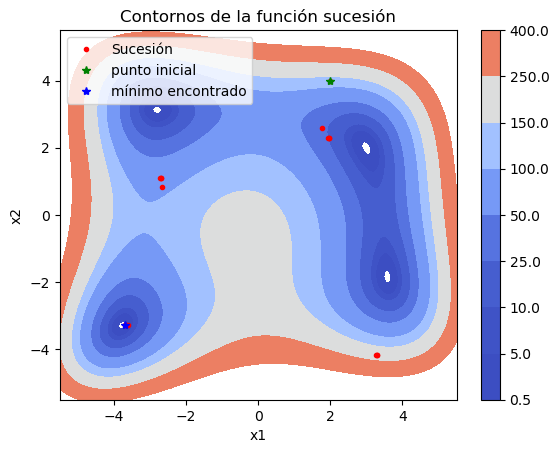

In [419]:
contornosFnc2D(Himmelblau, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

In [420]:
x0=[0,0]

xk,k,indicador,sucesion=descenso_minimo_I(Himmelblau,D_Himmelblau,x0)

if indicador:
    print("Para el punto inicial x0=",x0)
    print("Después de",k,"iteraciónes el mínimo se encontró en xk=",xk)
    print("La sucesión es:")
    for i in range(k):
        print(sucesion[i])

Para el punto inicial x0= [0, 0]
Después de 3 iteraciónes el mínimo se encontró en xk= [-1.14290774 -2.82229709]
La sucesión es:
[0, 0]
[-1.1429128  -2.82229488]
[-1.14290774 -2.82229709]


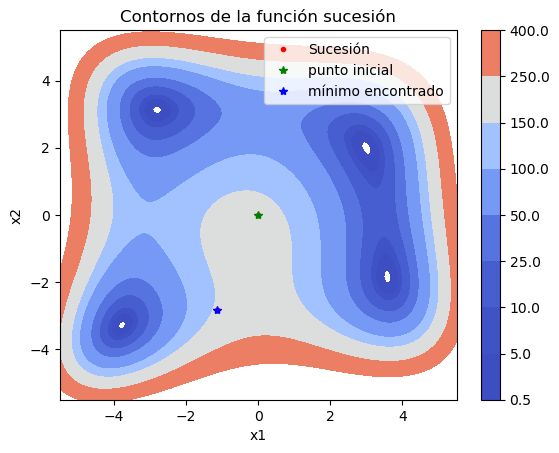

In [421]:
contornosFnc2D(Himmelblau, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

* **Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$



 
\begin{align*}
&\text{Derivada parcial de } f \text{ con respecto a } x_1: \\
\frac{\partial f}{\partial x_1} &= 2(1.5 - x_1 + x_1x_2)(-1 + x_2) \\
&\quad + 2(2.25 - x_1 + x_1x_2^2)(-1 + x_2^2) \\
&\quad + 2(2.625 - x_1 + x_1x_2^3)(-1 + x_2^3)
\end{align*}


\begin{align*}
&\text{Derivada parcial de } f \text{ con respecto a } x_1: \\
\frac{\partial f}{\partial x_2} &= 2(1.5 - x_1 + x_1x_2)(x_1) \\
&\quad + 2(2.25 - x_1 + x_1x_2^2)(2x_1x_2) \\
&\quad + 2(2.625 - x_1 + x_1x_2^3)(3x_1x_2^2)
\end{align*}

Esta función tiene 1 mínimos:

$f(3,0.5)=0$




In [422]:
# Definir la función f
def Beale(x):
    return (1.5 - (x[0]) + (x[0])*(x[1]))**2 + (2.25 - (x[0]) + (x[0])*(x[1])**2)**2 + (2.625 - (x[0]) + (x[0])*(x[1])**3)**2

def D_Beale(x):
    Partial_Beale_dx1 = 2*(1.5 - (x[0]) + (x[0])*(x[1]))*(-1 + (x[1])) + 2*(2.25 - (x[0]) + (x[0])*(x[1])**2)*(-1 + (x[1])**2) + 2*(2.625 - (x[0]) + (x[0])*(x[1])**3)*(-1 + (x[1])**3)
    Partial_Beale_dx2 = 2*(1.5 - (x[0]) + (x[0])*(x[1]))*((x[0])) + 2*(2.25 - (x[0]) + (x[0])*(x[1])**2)*(2*(x[0])*(x[1])) + 2*(2.625 - (x[0]) + (x[0])*(x[1])**3)*(3*(x[0])*(x[1])**2)
    return np.array([Partial_Beale_dx1, Partial_Beale_dx2])


A continuación se aplica a la función de Beale el algoritmo para los siguientes dos puntos inciales:
$$ \mathbf{x}_0 = (2.,3.) $$
$$ \mathbf{x}_0 = (2.,4.) $$

In [438]:
x0=[2,3]

xk,k,indicador,sucesion=descenso_minimo_I(Beale,D_Beale,x0)

if indicador:
    print("Para el punto inicial x0=",x0)
    print("Después de",k,"iteraciónes el mínimo se encontró en xk=",xk)
    print("La sucesión es:")
    for i in range(k-10,k): #solo se imprimieron los ultimos terminos para el pdf 
        print(sucesion[i])



Para el punto inicial x0= [2, 3]
Después de 470 iteraciónes el mínimo se encontró en xk= [2.99944505 0.49986454]
La sucesión es:
[2.99938132 0.49984077]
[2.99938596 0.49985011]
[2.99939678 0.49984475]
[2.9994013  0.49985386]
[2.99941185 0.49984863]
[2.99941625 0.49985751]
[2.99942654 0.49985241]
[2.99943084 0.49986107]
[2.99944086 0.4998561 ]
[2.99944505 0.49986454]


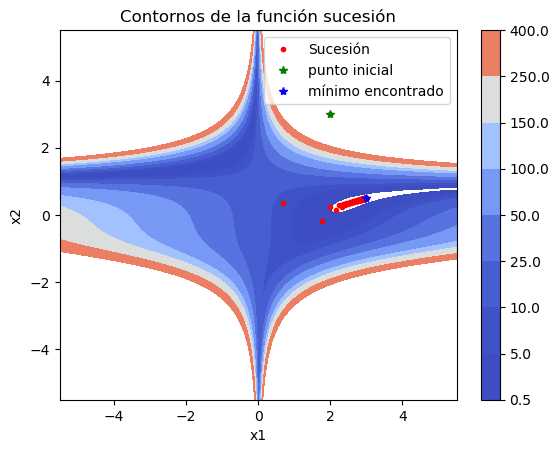

In [424]:
contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])

In [425]:
x0=[2,4]

xk,k,indicador,sucesion=descenso_minimo_I(Beale,D_Beale,x0)

if indicador:
    print("Para el punto inicial x0=",x0)
    print("Después de",k,"iteraciónes el mínimo se encontró en xk=",xk)
    print("La sucesión es:")
    for i in range(k):
        print(sucesion[i])
else:
    print("Para el punto inicial x0=",x0)
    print("No se cumplió la condución de tolerancia")
    print("El útimo elemento de la sucesión es xk=",xk, "con k=",k)

Para el punto inicial x0= [2, 4]
No se cumplió la condución de tolerancia
El útimo elemento de la sucesión es xk= [-5.01259866  1.16977361] con k= 10001


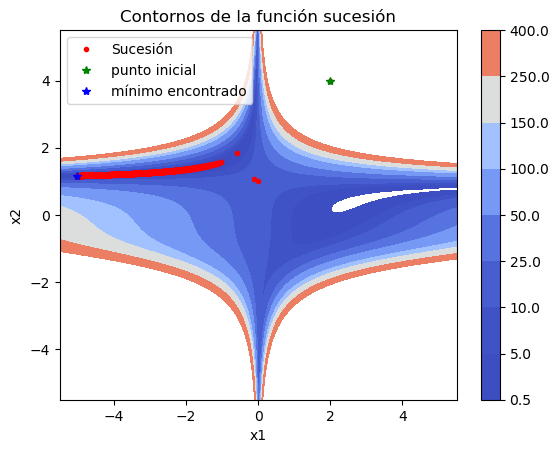

In [426]:
contornosFnc2D(Beale, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400])


* **Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$

Esta función tiene 1 mínimo (para cada n):

$f(1,1)=0$

$f(1,1,1...)=0$

In [427]:
def Rosenbrock(x):
    n = len(x)
    suma = 0
    for i in range(n-1):
        suma += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return suma

def D_Rosenbrock(x):
    n = len(x)
    gradient = np.zeros(n)
    for i in range(n-1):
        gradient[i] += -400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
        gradient[i+1] += 200 * (x[i+1] - x[i]**2)
    return gradient

A continuación se aplica a la función de Himmelblau el algoritmo para los siguientes dos puntos inciales:
$$ \mathbf{x}_0 = (-2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0) $$
$$ \mathbf{x}_0 = (-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0) $$

In [439]:
x0=[-2.1,4.5]

xk,k,indicador,sucesion=descenso_minimo_I(Rosenbrock,D_Rosenbrock,x0)

if indicador:
    print("Para el punto inicial x0=",x0)
    print("Después de",k,"iteraciónes el mínimo se encontró en xk=",xk)
    print("La sucesión es:")
    for i in range(k-10,k):#solo se imprimieron los ultimos terminos para el pdf 
        print(sucesion[i])

Para el punto inicial x0= [-2.1, 4.5]
Después de 3115 iteraciónes el mínimo se encontró en xk= [1.00338062 1.00678361]
La sucesión es:
[1.00342252 1.00688833]
[1.00342915 1.00688115]
[1.00341035 1.00686379]
[1.00341695 1.00685664]
[1.00339822 1.00683934]
[1.0034048  1.00683221]
[1.00338613 1.00681498]
[1.00339269 1.00680787]
[1.00337409 1.0067907 ]
[1.00338062 1.00678361]


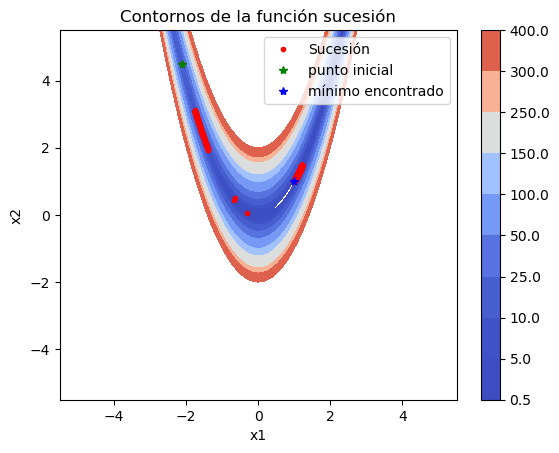

In [429]:
contornosFnc2D(Rosenbrock, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[ 0.5, 5, 10, 25, 50, 100, 150, 250,300, 400])

In [440]:
x0=[-1.2,1]

xk,k,indicador,sucesion=descenso_minimo_I(Rosenbrock,D_Rosenbrock,x0)

if indicador:
    print("Para el punto inicial x0=",x0)
    print("Después de",k,"iteraciónes el mínimo se encontró en xk=",xk)
    print("La sucesión es:")
    for i in range(k-10,k):#solo se imprimieron los ultimos terminos para el pdf 
        print(sucesion[i])

Para el punto inicial x0= [-1.2, 1]
Después de 8173 iteraciónes el mínimo se encontró en xk= [1.0040565  1.00813853]
La sucesión es:
[1.00407887 1.00819982]
[1.00408251 1.00819082]
[1.00407235 1.0081867 ]
[1.004076   1.00817772]
[1.00406585 1.0081736 ]
[1.00406949 1.00816463]
[1.00405936 1.00816052]
[1.00406299 1.00815157]
[1.00405288 1.00814747]
[1.0040565  1.00813853]


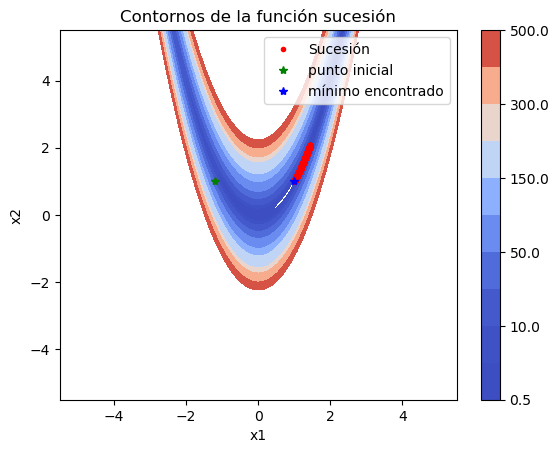

In [431]:
contornosFnc2D(Rosenbrock, sucesion,xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5,
               levels=[ 0.5, 5, 10, 25, 50, 100, 150, 250,300, 400,500])

In [432]:
x0=[-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5]

xk,k,indicador,sucesion=descenso_minimo_I(Rosenbrock,D_Rosenbrock,x0)

if indicador:
    print("Para el punto inicial x0=",x0)
    print("Después de",k,"iteraciónes el mínimo se encontró en \n xk=",xk)
    


Para el punto inicial x0= [-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5]
Después de 7781 iteraciónes el mínimo se encontró en 
 xk= [0.99997994 0.99995841 0.99991928 0.99983454 0.99967253 0.99933911
 0.99867953 0.99735071 0.9946977  0.98939561]


In [433]:
x0=[-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0]

xk,k,indicador,sucesion=descenso_minimo_I(Rosenbrock,D_Rosenbrock,x0)

if indicador:
    print("Para el punto inicial x0=",x0)
    print("Después de",k,"iteraciónes el mínimo se encontró en \n xk=",xk)
    

Para el punto inicial x0= [-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0]
Después de 7642 iteraciónes el mínimo se encontró en 
 xk= [0.99997944 0.99995745 0.99991726 0.99983062 0.99966452 0.99932322
 0.99864753 0.99728678 0.99456977 0.98914054]


3. Repita la prueba para función de Rosenbrock usando el punto inicial $\mathbf{x}_0 = (-2.1, 4.5)$
   usando $\tau_2 = \epsilon_m^{1/4}$ y $N_{gs}=50$ para relajar las condiciones de
   paro del método de la sección dorada y ver si podemos terminar más rápido.
   Escriba un comentario sobre si conviene hacer esto o cuando no conviene hacerlo.

In [441]:
x0=[-2.1,4.5]

xk,k,indicador,sucesion=descenso_minimo_I(Rosenbrock,D_Rosenbrock,x0,tau2=epsilon**0.25,n2=50)

if indicador:
    print("Para el punto inicial x0=",x0)
    print("Después de",k,"iteraciónes el mínimo se encontró en xk=",xk)
    print("La sucesión es:")
    for i in range(k-10,k):#solo se imprimieron los ultimos terminos para el pdf 
        print(sucesion[i])

Para el punto inicial x0= [-2.1, 4.5]
Después de 6761 iteraciónes el mínimo se encontró en xk= [1.00138956 1.00278695]
La sucesión es:
[1.00153754 1.0030614 ]
[1.00152791 1.00306465]
[1.00149952 1.00298364]
[1.00148932 1.00298722]
[1.00146653 1.00291983]
[1.00145732 1.00292295]
[1.00143005 1.00284526]
[1.0014203  1.00284868]
[1.00139837 1.00278396]
[1.00138956 1.00278695]


<font size=4.5 color='lightblue'>

$\textit{Ejercicio 4}$

Sea $f(x) = (x-1)^2$ con $x \in \mathbb{R}$ y generamos la secuencia 

$$ x_{k+1} = x_k - \frac{\alpha}{2^k} f'(x_k) $$ 

con $0 < \alpha < 1$, para obtener el minimizador de la función $f(x)$. ¿Tiene este algoritmo
la propiedad de descenso, es decir, $f(x_{k+1}) < f(x_k)$ a partir de un
cierto $k$? ¿Es el algoritmo globalmente convergente?

In [435]:
def f(x):
    return (x-1)**2

def df(x):
    return 2*(x-1)


Observemos la gráfica de f:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


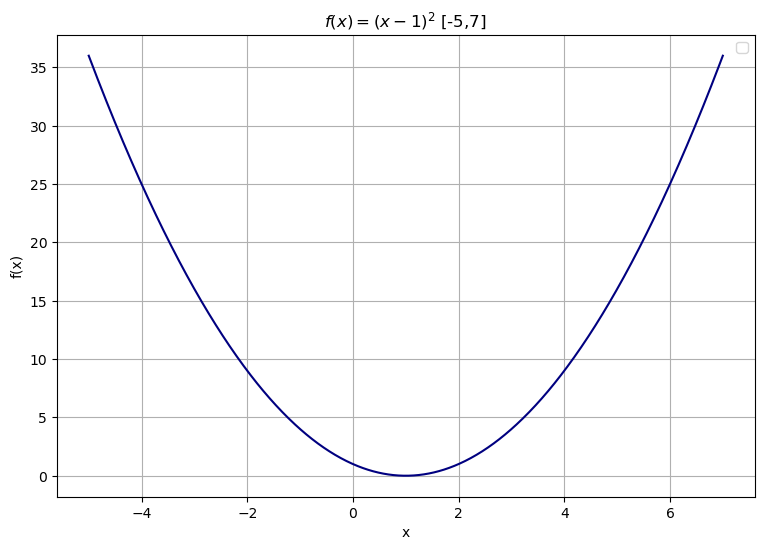

In [436]:
x = np.linspace(-5, 7, 1000)

plt.figure(figsize=(9,6)) 
plt.plot(x,f(x),'navy')
#plt.plot(x_m3,f3(x_m3),'ro',label="Mínimo $(0.67958,f2(0.67958))$")
plt.ylabel('f(x)')
plt.xlabel('x')
plt.legend()
plt.title('$f(x)=(x-1)^2$ [-5,7]')
plt.grid()

Este algoritmo NO cumple la propiedad del descenso pues al realizar $ x_{k+1} = x_k - \frac{\alpha}{2^k} f'(x_k) $ 

siempre puede suceder que $x_{k+1}<1$ y $x_{k}>1$ (o al revés) de manera que que  

$f(x_{k+1}) >= f(x_k)$ pues la función f es simétrica respecto a 1. Esto puede suceder con otras funciones también.

El algoritmo para esta función es globalmente convergente pues el gradiente siempre apunta en la misma dirección ya que hay un único mínimo global y la función es convexa. Con otras funciones esto no necesariamente sucede, puede haber más de un mínimo cerca y el gradiente puede cambiar de dirección y estancarse.